<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Математическая статистика в python", лекция №2.
# Центральная предельная теорема и статистический анализ данных.

Подключаем необходимые библиотеки

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
import random
%matplotlib inline

# Корреляция. Визуализация корреляции в python

In [4]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Данный датасет представляет собой информацию об уровне "счастья" в странах. 
В таблице представлены следующие переменные:
*  Country - название страны
*  Ladder - показатель насколько удовлетворены жизнью
*  SD of Ladder - среднеквадратическое отклонение показателя удовлетворенностью жизнью
*  Positive affect - показатель позитивных эмоций
*  Negative affect - показатель негативных эмоций
*  Social support - насколько социальная поддержка повлияла на уровень счастья
*  Freedom - насколько показатель степени свободы повлиял на уровень счастья
*  Corruption - насколько показатель коррупции влияет на уровень счастья
*  Generosity - насколько уровень щедрости влияет на уровень счастья
*  Log of GDP per capita - насколько Валовый Внутренний продукт влияет на уровень счастья
*  Healthy life expectancy - насколько продолжительность жизни влияет на уровень счастья


Сделаем точечный график двух выборок из таблицы "World happiness report".

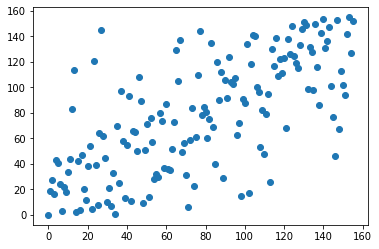

In [9]:
freedom = df['Freedom']
positive = df['Positive affect']
plt.scatter(freedom, positive)

**Ковариация** - степень разброса данных относительно друг друга.

Посчитаем ковариацию двух выборок в pandas:

In [11]:
df[['Freedom', 'Positive affect']].cov()

,Freedom,Positive affect
Freedom,2041.000000,1403.903226
Positive affect,1403.903226,2041.000000


**Корреляция** - нормированная ковариация. Считается по формуле Пирсона.

In [12]:
pearsonr(freedom, positive)

(0.6878506740844935, 3.447924421383054e-23)

Коэффициент корреляции Пирсона = 0.68 или 68%. 

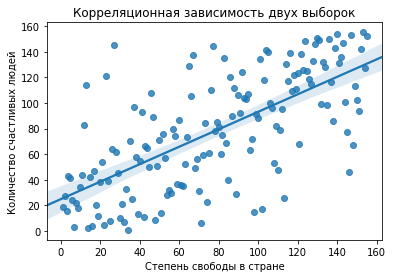

In [6]:
freedom = df['Freedom']
positive = df['Positive affect']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= freedom, y=positive, data=df, fit_reg=True)
plt.xlabel('Степень свободы в стране')
plt.ylabel('Количество счастливых людей')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Корреляция **regplot** с добавлением **регрессионного анализа**. Линейная регрессия -  используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной {\displaystyle y}y от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) {\displaystyle x}x с линейной функцией зависимости.

# Линейная регрессия

Почистим данные от выбросов

**Заполним отсутствующие значения** некой переменной (0, например) - один из методов борьбы с выбросами

In [13]:
df['Freedom'].fillna(0, inplace = True)
df['Positive affect'].fillna(0, inplace = True)

Построим модель для двух переменных Freedom и Positive affect

In [14]:
freedom = df['Freedom']
positive = df['Positive affect']

Библиотека sklearn в python - мощное средство для анализа данных. Позволяет строить различные модели.

Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array

In [15]:
freedom = np.array(freedom).reshape(-1,1)
positive = np.array(positive).reshape(-1,1)

Линейная регрессия строится на том основании, что две переменные имеют линейную зависимость.

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Разделим на 80% тренировочных и на 20% тестовых

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    freedom,
    positive,
    test_size = 0.2,
    random_state = 3
)

Обучим модель

In [21]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Посмотрим предсказания модели на тестируемых данных

In [22]:
predicted_y = model.predict(X_test)

Посчитаем ошибку модели

In [23]:
model.score(X_test, y_test)

0.6323523769785387

63% точности на тестовых данных

Построим график линейной регресии

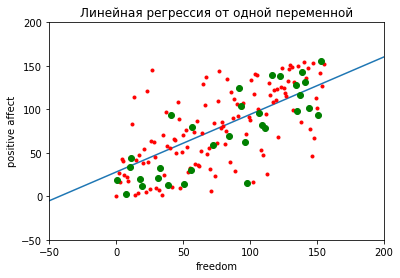

In [28]:
plt.xlabel('freedom')
plt.ylabel('positive affect')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-50,200)
plt.ylim(-50,200)
plt.show()

В данном случае получается зависимость двух переменных: чем больше свободы, тем более позитивно население.

Второй пример линейной регрессии:

**Jointplot**: corruption и negative affect. Можно также заметить, что между ними корреляция нелинейна.

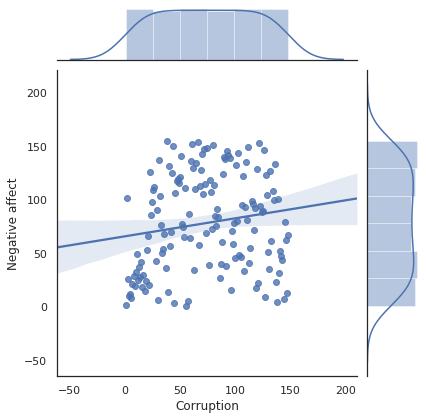

In [29]:
corruption = df['Corruption']
negative = df['Negative affect']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=corruption, y=negative, data=df, kind='reg')
plt.show()

# Примеры матрицы корреляций для 3 выборок

Загрузим датасет цветов ириса. 
В этом датасете показана проблема **классификации**.
В этом датасете всего 3 класса различных цветов. Каждый из классов отличается по 4 параметрам (features): 
1.  sepal length in cm 
2.  sepal width in cm 
3.  petal length in cm 
4.  petal width in cm 

Названия классов: 
*  Iris Setosa 
*  Iris Versicolour 
*  Iris Virginica

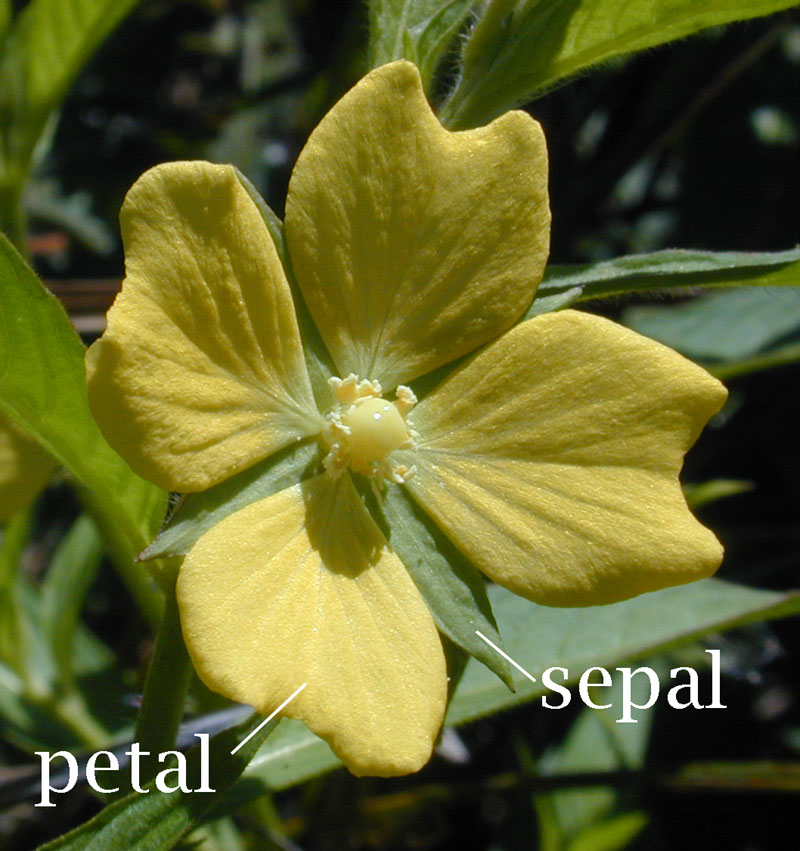

In [17]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg', width=300, height=300)

Загрузим датасет:

In [32]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, names=["Sepal length", "Sepal width", "Petal length", "Petal width", 'species'])
data.head()

,Sepal length,Sepal width,Petal length,Petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Построим попарные графики для выборок, а также частотные графики на главной диагонали  с помощью метода **pairplot**.

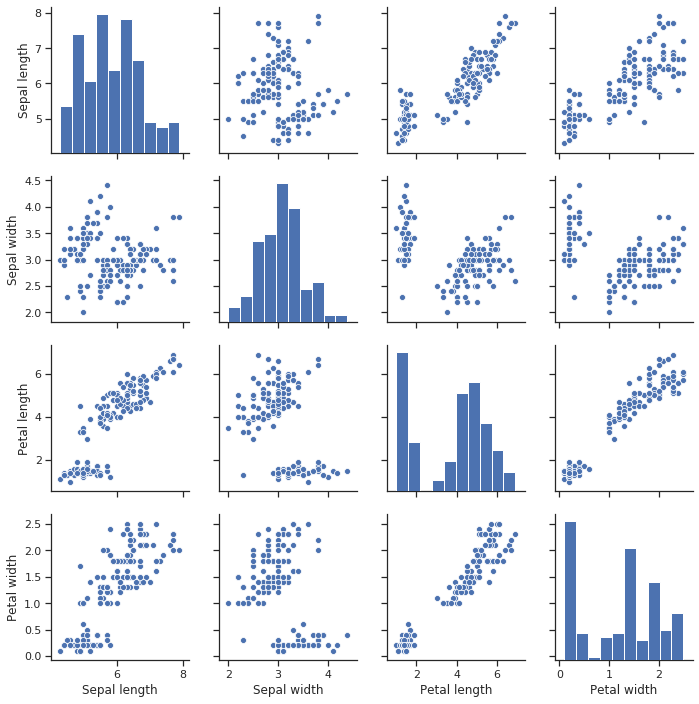

In [33]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(data)

Проведем классификационный анализ всех выборок попарно с помощью параметра hue, где мы указываем наименование классов:

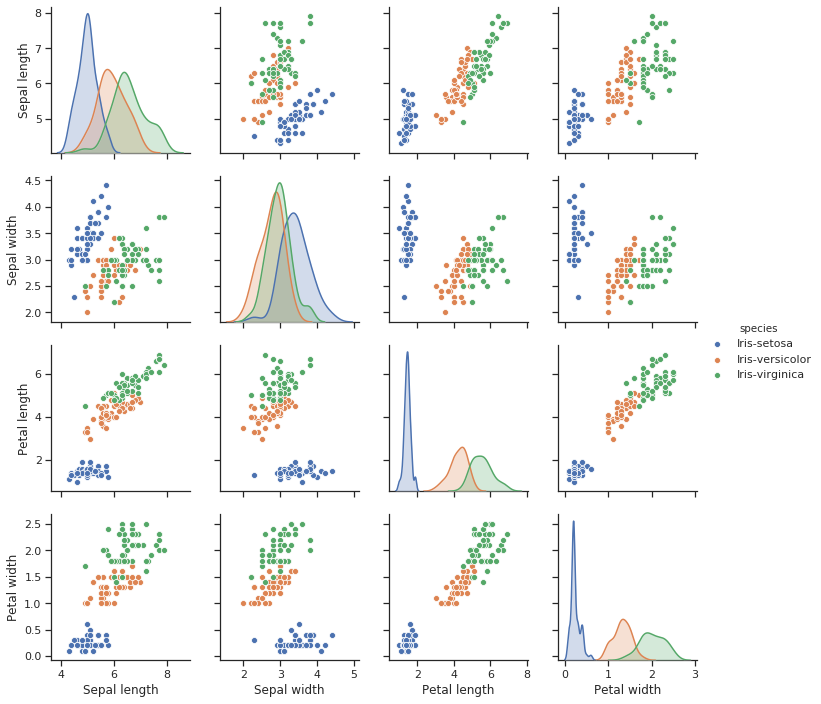

In [34]:
fig = sns.pairplot(data=data, hue='species')
plt.show()

Посмотрим различия трех видов цветов друг от друга

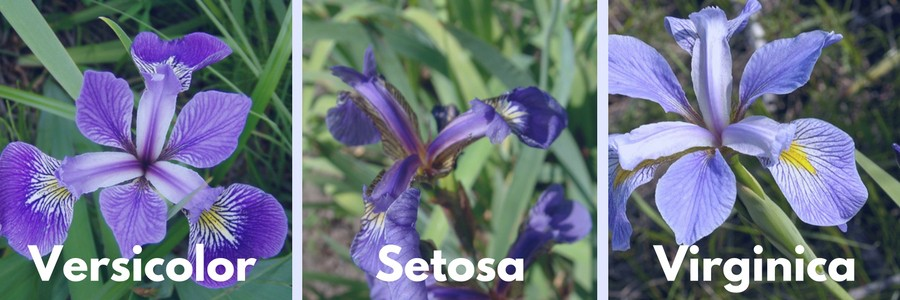

In [35]:
from IPython.display import Image
Image('https://pp.userapi.com/c853524/v853524724/6e4da/vduVoAF89Zg.jpg')

3 типа цветов отличаются размерами цветков и лепестков. 2 из этих цветков похожи между собой.

Матрица корреляций для 4-мерного пространства:

$$
\Sigma = \begin{bmatrix}
    \rho_{1}^2  \quad \rho_{1,2} \quad \rho_{1,3} \quad \rho_{1,4} \\
    \rho_{2,1}  \quad \rho_{2}^2 \quad \rho_{2,3} \quad \sigma_{2,4} \\
    \rho_{3,1}  \quad \rho_{3,2} \quad \rho_{3}^2 \quad \rho_{4,3} \\
    \rho_{4,1}  \quad \rho_{4,2} \quad \rho_{4,3} \quad \rho_{4}^2
\end{bmatrix}
$$


**Критерий Пирсона** также не зависит от нормирования


Корелляция Пирсона:
$$\rho_{x, y} = \frac{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}} \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (y_i - \bar{y})^2}}}
$$
Измеряет линейную зависимость между величинами, предполагая, что выборки составляют нормальное распределение

Матрица корреляций - это нормированная матрица корреляций.

Создадим таблицу X из таблицы о цветах ириса: выбираем первые четыре колонки (команда .iloc[:,:4])

In [42]:
X = data.iloc[:,:4]

In [43]:
X.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Для подсчета **матрицы корреляций** можно использовать метод corr, который нормализует значения.

In [44]:
np.round_(X.corr(), decimals=2)

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.00,-0.11,0.87,0.82
Sepal width,-0.11,1.00,-0.42,-0.36
Petal length,0.87,-0.42,1.00,0.96
Petal width,0.82,-0.36,0.96,1.00


2-ой способ подсчета матрицы корреляций:

In [45]:
print('Корреляционная матрица, посчитанная для исходной таблицы:')
np.round_(np.corrcoef(X.T), decimals=2)

Корреляционная матрица, посчитанная для исходной таблицы:


array([[ 1.  , -0.11,  0.87,  0.82],
       [-0.11,  1.  , -0.42, -0.36],
       [ 0.87, -0.42,  1.  ,  0.96],
       [ 0.82, -0.36,  0.96,  1.  ]])

**Но!** Корреляция не всегда линейна

# Нормальное распределение. Правило трех сигм.

Возьмем выборку sepal_width датасета ирисов:

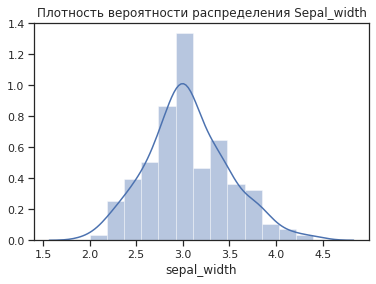

In [46]:
sepal_width = iris['sepal_width']
sns.distplot(sepal_width)
plt.title('Плотность вероятности распределения Sepal_width')
plt.show()

По графику можно определить, что выборка является нормальной.

**Правило трех сигм гласит**, что вероятность того, что случайная величина отклонится от своего математического ожидания более, чем на три среднеквадратических отклонений, практически равна 0. 

Посчитаем математическое ожидание для выборки.



In [47]:
statistics.mean(sepal_width)

3.0573333333333332

Посчитаем среднеквадратическое отклонение:

In [48]:
statistics.pstdev(sepal_width)

0.43441096773549454

Посчитаем количество элементов, лежащих в промежутке, выходящем за интервалы mean +/- 3*sigma, где sigma - среднеквадратическое отклонение, mean - мат ожидание

In [49]:
mean = statistics.mean(sepal_width)
sigma = statistics.pstdev(sepal_width)
count_left = sepal_width[sepal_width<=mean-3*sigma].count()
print('Количество элементов меньше mean-3*sigma: ', count_left)
count_right = sepal_width[sepal_width>=mean+3*sigma].count()
print('Количество элементов больше mean+3*sigma: ', count_right)

Количество элементов меньше mean-3*sigma:  0
Количество элементов больше mean+3*sigma:  1


Посчитаем количество элементов, лежащих в промежутке, выходящем за интервалы mean +/- 2*sigma:

In [50]:
count_left = sepal_width[sepal_width<=mean-2*sigma].count()
count_right = sepal_width[sepal_width>=mean+2*sigma].count()
count_all = count_right+count_left
print('Количество элементов за пределеами mean-/+2*sigma: ', count_all)
print('В процентном соотношении: ', count_all/len(sepal_width))


Количество элементов за пределеами mean-/+2*sigma:  5
В процентном соотношении:  0.03333333333333333


Количество элементов, лежащих в промежутке от [mean-sigma; mean+sigma]:

In [51]:
count_left = sepal_width[sepal_width<=mean-sigma].count()
count_right = sepal_width[sepal_width>=mean+sigma].count()
count_all = count_right+count_left
print('Количество элементов за пределеами mean-/+sigma: ', count_all)
print('В процентном соотношении: ', count_all/len(sepal_width))

Количество элементов за пределеами mean-/+sigma:  49
В процентном соотношении:  0.32666666666666666


# Центральная предельная теорема (Теорема Ляпунова)

Центра́льные преде́льные теоре́мы (Ц. П. Т.) — класс теорем в теории вероятностей, утверждающих, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному. Также иногда называется "законом больших чисел".

[0.05602737 0.5137999  0.29607055 0.3130308  0.73740692 0.51464967
 0.06274131 0.34187859 0.82414958 0.47379194]


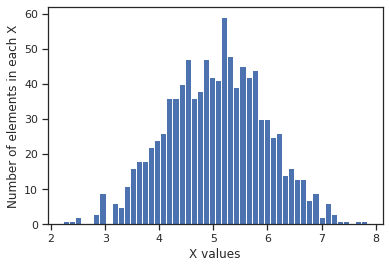

In [84]:
number_of_sums = 1000
number_of_randoms = 10
X1 = np.zeros([number_of_sums])
print(np.random.rand(number_of_randoms))
for i in range(number_of_sums):
    # суммируем 10 сгенерированных чисел в промежутке [0,1]
    X1[i] = np.sum(np.random.rand(number_of_randoms))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

   Закон больших чисел играет важное значение в теоретическом плане, т.к. он служит обоснованием методов математической статистики. На практике закон больших чисел можно продемонстрировать на примере погоды. Например, **атмосферное давление** каждый день есть величина случайная. Однако ее среднегодовое значение в течении многих лет практически не изменяется. 
   
   Загрузим таблицу изменения атмосферного давления по дням с 1985 года до 2020 года, для города Базель (Швейцария) - https://www.meteoblue.com

In [138]:
url="http://yustiks.ru/dataset/history2.csv"
df=pd.read_csv(url)
df['MSL'] = df['Mean Sea Level Pressure daily mean [MSL]']
df.head()

,Year,Month,Day,Hour,Minute,Mean Sea Level Pressure daily mean [MSL],Mean Sea Level Pressure daily max [MSL],Mean Sea Level Pressure daily min [MSL],MSL
0,1985,1,1,0,0,1012.84,1028.2,1005.3,1012.84
1,1985,1,2,0,0,1007.37,1010.5,1005.3,1007.37
2,1985,1,3,0,0,1012.52,1013.8,1010.9,1012.52
3,1985,1,4,0,0,1007.45,1012.3,1002.2,1007.45
4,1985,1,5,0,0,1012.58,1014.6,1011.1,1012.58


Рассмотрим распределение давления в данном городе по определенному году и месяцу (распределение не является нормальным):

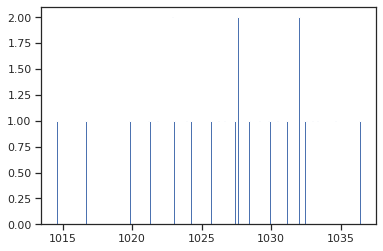

In [143]:
plt.hist(df[(df['Year']==2000) & (df['Month']==1)].MSL, 200)
plt.show()

Рассмотрим частотный график по всему году (он становится похож на нормальное распределение):

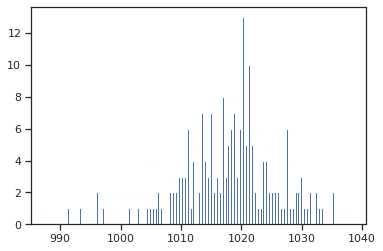

In [145]:
plt.hist(df[(df['Year']==2000)].MSL, 200)
plt.show()

Возьмем все года и построим частотный график (выборка становится нормальной)

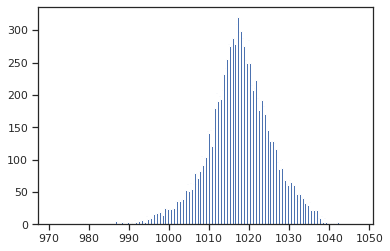

In [146]:
df['MSL'] = df['Mean Sea Level Pressure daily mean [MSL]']
plt.hist(df.MSL, 200)
plt.show()

Если есть выборка объема из из практически любого распределения достаточно большого объема, то данную выборку можно приблизить нормальным рапределением.

# Дискретные и непрерывные распределения

[ 4.24041031 15.78531826  3.20967464 ...  5.92702758  1.99054679
  3.6684193 ]
Среднее значение:  3.9981590206772397


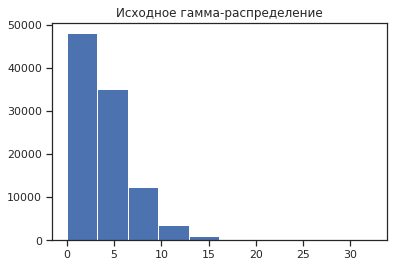

In [147]:
import scipy.special as sps

# Создадим выборку из гамма-распределения
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 100000)
print(s)
print('Среднее значение: ',np.mean(s))


plt.hist(s)
plt.title('Исходное гамма-распределение')
plt.show()

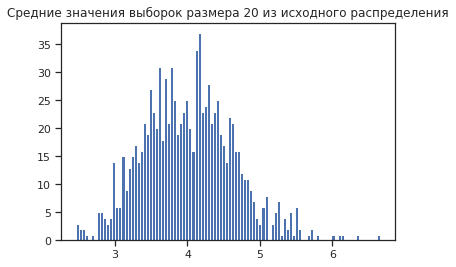

In [150]:
# Распределение средних значений выборки размера 20 из исходного распределения является нормальным
samples = [ np.mean(random.choices(s, k=20)) for _ in range(1000) ]

plt.hist(samples, 100)
plt.title('Средние значения выборок размера 20 из исходного распределения')
plt.show()

# Непрерывное распределение:

In [0]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
avocado=pd.read_csv(url, index_col=0)
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Нормирование

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(avocado[['Small Bags', 'Large Bags']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0 -0.998714 -0.999967
1 -0.998594 -0.999966
2 -0.998798 -0.999964
3 -0.999152 -0.999953
4 -0.999105 -0.999931


In [0]:
small_bags = df_norm[0]
large_bags = df_norm[1]

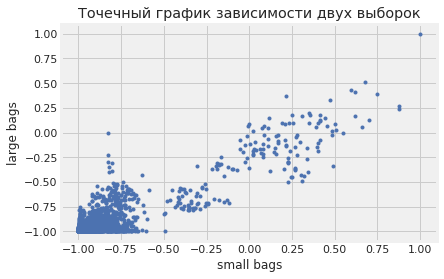

In [0]:
plt.xlabel('small bags')
plt.ylabel('large bags')
plt.plot(small_bags, large_bags, 'b.')
plt.title('Точечный график зависимости двух выборок')
plt.show()

Посмотрим частотный график данных для large_bags

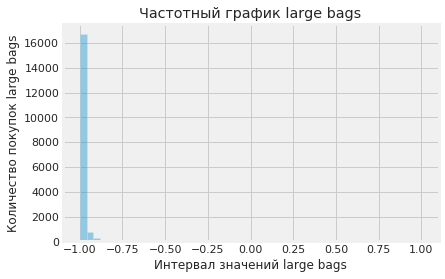

In [0]:
sns.distplot(large_bags, kde = False)
plt.xlabel('Интервал значений large bags')
plt.ylabel('Количество покупок large bags')
plt.title('Частотный график large bags')
plt.show()

Не совсем понятно, что это за распределение

Увеличим график

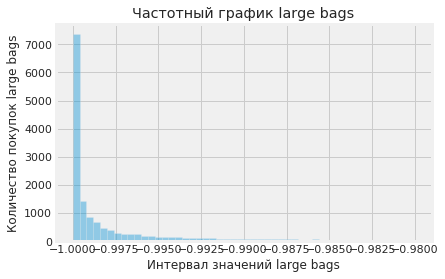

In [0]:
sns.distplot(large_bags[large_bags<-0.98], kde = False)
plt.xlabel('Интервал значений large bags')
plt.ylabel('Количество покупок large bags')
plt.title('Частотный график large bags')
plt.show()

Похоже на геометрическое (но геометрическое - это дискретное распределение). Следующее предположение - это распределение экспоненциальное (является непрерывным).

Посмотрим разброс данных для small_bags

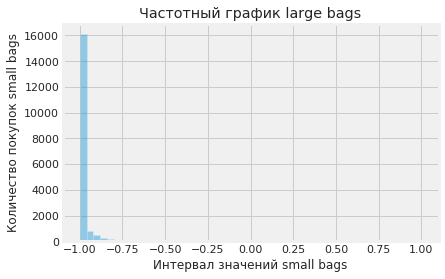

In [0]:
sns.distplot(small_bags, kde = False)
plt.xlabel('Интервал значений small bags')
plt.ylabel('Количество покупок small bags')
plt.title('Частотный график large bags')
plt.show()

Увеличим интервал

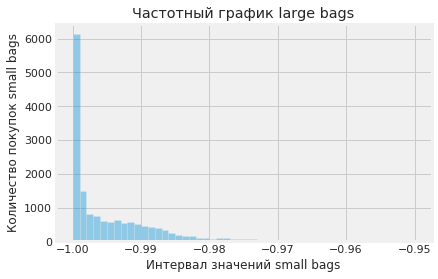

In [0]:
sns.distplot(small_bags[small_bags<-0.95], kde = False)
plt.xlabel('Интервал значений small bags')
plt.ylabel('Количество покупок small bags')
plt.title('Частотный график large bags')
plt.show()

Данное распределение очень похоже на **геометрическое распределение** или **логнормальное**, или **экспоненциальное**

Но **геометрическое распределение** для **дискретных величин**, в начшем случае это **непрерывная величина**. Значит, это скорее **логнормальное распределение** или **экспоненциальное**. 

Генерация **логнормального** распределения с помощью python

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


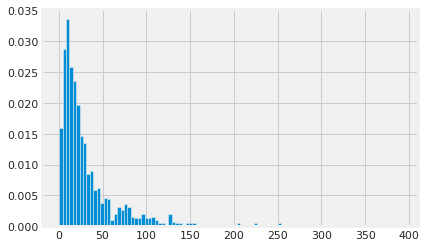

In [0]:
mu, sigma = 3., 1. # среднее значение и отклонение
s = np.random.lognormal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')
plt.show()

Логнормальное распределение задается плотностью вероятности, имеющей вид:
$$p(x)=\frac{1}{\sigma x\sqrt{2\pi }}e^{-\frac{(ln(x)-\mu )^{2}}{2\sigma^{2}}}$$

где $\mu$ это среднее значение, а $\sigma$ стандартное отклонение нормального распределения логарифма. 

Генерация **экспоненциального распределения** 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


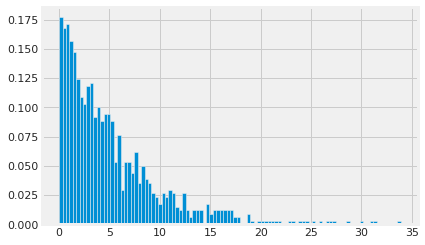

In [0]:
scale, size = 5. , 1000 # scale = параметр beta, size - размер выборки
s = np.random.exponential(scale=scale, size=size)
count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')
plt.show()

**Экспоненциальное распределение** задается плотностью вероятности, имеющий вид:

$$f(x;\frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})$$

для x > 0, и равно нулю в остальных случаях.

$\beta$ - scale параметр в предыдущем коде.

**Экспоненциальное распределение** является аналогом геометрического распределения в непрерывных распределениях. Типичный пример экспоненциального распределения - размер дождевой капли, полученный в ходе множества дождевых бурь. Другой пример - время между запросами к страницам wikipedii. 

# Дискретные распределения

В данном распределении число значений определено (например, это подбрасывание кубика, выпадение монеты, карты).

**Распределение Бернулли**

In [0]:
p = 0.3
mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')

Бернулли возвращает значения либо 1, либо 0. Чтобы сгенерировать 10000 случайных чисел Бернулли с вероятностью успеха p =0.3, мы будем использовать bernoulli.rvs с 2мя аргументами.

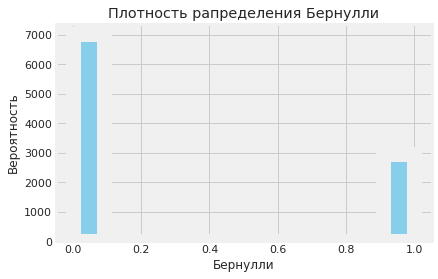

In [0]:
# import seaborn
import seaborn as sns
data_bern = stats.bernoulli.rvs(size=10000,p=0.3)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения Бернулли')
plt.show()

**Пример** подбрасывание монеты

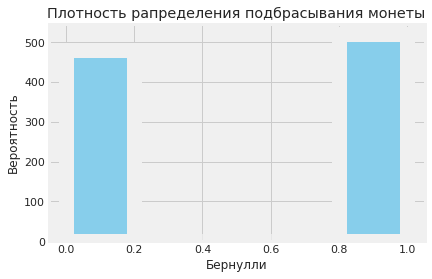

Количество выпавшей решки:  520


In [0]:
rng = np.random.RandomState(123)

coin_flips = rng.randint(0, 2, size=1000)
ax= sns.distplot(coin_flips,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения подбрасывания монеты')
plt.show()
heads = np.sum(coin_flips)
print('Количество выпавшей решки: ',heads)

С увеличением числа выборки вероятность увеличивается

In [0]:
rng = np.random.RandomState(123)

for i in range(7):
    num = 10**i
    coin_flips = rng.randint(0, 2, size=num)
    heads_proba = np.mean(coin_flips)
    print('Вероятность выпадения решки: %.2f' % (heads_proba*100))

Вероятность выпадения решки: 0.00
Вероятность выпадения решки: 40.00
Вероятность выпадения решки: 47.00
Вероятность выпадения решки: 53.70
Вероятность выпадения решки: 49.53
Вероятность выпадения решки: 49.80
Вероятность выпадения решки: 50.03


Вероятностное распределение в 1000 подбрасываний

1 experiment with coin flips:  [1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1
 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0]


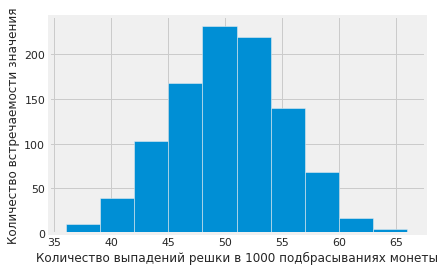

In [0]:
n_experiments = 1000
n_bernoulli_trials = 100

rng = np.random.RandomState(123)
outcomes = np.empty(n_experiments, dtype=np.float)

for i in range(n_experiments):
    coin_flips = rng.randint(0, 2, size=n_bernoulli_trials)
    # coin_flips - выборка из 100 подбрасываний
    head_counts = np.sum(coin_flips)
    outcomes[i] = head_counts

print('1 experiment with coin flips: ', coin_flips)
plt.hist(outcomes)
plt.xlabel('Количество выпадений решки в 1000 подбрасываниях монеты')
plt.ylabel('Количество встречаемости значения')
plt.show()

# Биномиальное распределение

Обобщение распределения Бернулли: биномиальное распределение можно представить как сумму исходов тех вещей, которые следуют распределению Бернулли. 

Киньте честную монету два раза – сколько раз будет орёл? Это число, подчиняющееся биномиальному распределению. Его параметры – n, число испытаний, и p – вероятность «успеха» (в нашем случае – орла или 1). Каждый бросок – распределённый по Бернулли исход, или испытание. Используйте биномиальное распределение, когда считаете количество успехов в вещах типа броска монеты, где каждый бросок не зависит от других и имеет одинаковую вероятность успеха.

Или представьте урну с одинаковым количество белых и чёрных шаров. Закройте глаза, вытащите шар, запишите его цвет и верните назад. Повторите. Сколько раз вытащился чёрный шар? Это число также подчиняется биномиальному распределению.

In [0]:
data_binom = stats.binom.rvs(n=10,p=0.8,size=10000)

Рассматриваем n экспериментов с вероятностью успеха p

[Text(0, 0.5, 'Частота (плотность)'),
 Text(0.5, 0, 'Биноминальное распределение')]

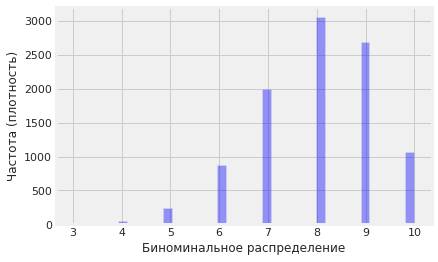

In [0]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue')
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)')

# Геометрическое распределение

Геометри́ческое распределе́ние в теории вероятностей — распределение дискретной случайной величины, равной количеству испытаний случайного эксперимента до наблюдения первого «успеха». 
Пусть $X_{1},...X_{n}$ - бесконечная последовательность независимых случайных величин с распределением Бернулли, то есть
$$X_{i} = \left \{ \begin{matrix}
1, & p & \\ 
0, & q=1-p & i = 1,2,.. 
\end{matrix} \right.$$
Построим случайную величину ${\displaystyle Y=\min \left\{i\mid X_{i}=1\right\}-1}$ — количество «неудач» до первого «успеха». Распределение случайной величины Y называется геометрическим с вероятностью «успеха» p, что обозначается следующим образом:  $Y\sim \mathrm {Geom} (p)$.
Функция вероятности случайной величины Y имеет вид:

${\displaystyle \mathbb {P} (Y=n)=q^{n}p,\;n=0,1,2,\ldots } $

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13
row_0                                                              
counts  4893  2518  1292  656  301  162  84  46  19  18   8   1   2


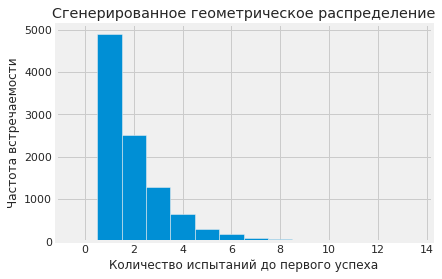

In [0]:
import random
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # сгенерировать дату
                                  p=0.5)       # с вероятностью успеха 0.5

# Напечатать данные
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Частотная зависимость
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1)
plt.xlabel('Количество испытаний до первого успеха')
plt.ylabel('Частота встречаемости')
plt.title('Сгенерированное геометрическое распределение')
plt.show()

График распределения похож на то, что мы ожидаем: очень вероятно получить значение решки за одно или два подкидывания монеты, и маловероятно получить только за 5 подкидываний. В 10000 сгенерированных подкидываний, самое максимальное занимает 13 подкидываний, чтобы получить решку. 

# Распределение Стьюдента



Получение информации о распределении


*  loc - положение центра выборки (на сколько смещена относительно центра)
*  scale - масштабирование выборки (разброс)
*  skew - коэффицие́нт асимметри́и в теории вероятностей — величина, характеризующая асимметрию распределения данной случайной величины: положительное - выборка наклонена вправо, отрицательная - влево

![skew](https://pp.userapi.com/c851536/v851536486/ffb71/uFExpi7Pxvs.jpg)
*  kurt - коэффицие́нт эксце́сса - мера остроты пика

![kurt](https://pp.userapi.com/c851536/v851536486/ffb82/sRWYxq1SCR0.jpg)



In [0]:
from scipy.stats import t

# Количество выборки df=20, loc=0, scale=1 stats() для вычисления среднего, разброса, 
# негативное skew показывает, что выборка сдвинута влево, положительное - что сдвинута вправо
#
rv = t(df=20, loc=0, scale=1)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.11111111), array(0.), array(0.375))

График плотности распределения

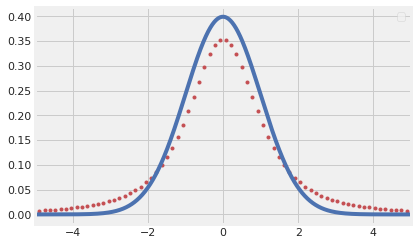

In [0]:
rv = t(df=2, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 1000)
y = rv.pdf(x) 

x1 = np.linspace(-5,5,1000)   
y1 = norm.pdf(x1)              

plt.xlim(-5,5)
plt.legend(['Нормальное распределение', 'Стьюдента'])
plt.plot(x,y,'r.')
plt.plot(x1,y1,'b')
plt.show()

Вероятность перехода пороговой границы 

In [0]:
a = 0.05  # задать порог

rv = t(df=20, loc=0, scale=1)
x = np.random.normal(size=1)

p = rv.sf(x) # задаем

if p < a:
    print('Вероятность перехода пороговой границы: ', x, p)
else:
    print('Вероятность не успеха', x, p)

Вероятность не успеха [1.57653388] [0.06529472]
